In [166]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale
import sweetviz as sv
import arabic_reshaper
from bidi.algorithm import get_display

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [167]:
!pip install arabic-reshaper

In [168]:
!pip install python-bidi

In [169]:
!pip install plotly

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [171]:
job_posts = pd.read_csv("Data/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [173]:
job_posts.shape

(1470, 18)

In [174]:
job_posts_report = dtale.show(job_posts)
job_posts_report

In [175]:
job_posts[job_posts['job_post_id']==20202026314796]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
531,مساعد صحي,06/05/1444,['أداء مهام بسيطة لمساعدة الأطباء والممرضين في...,[' تحضير المريض للكشف أو المعالجة وتحضير ومن...,مجمع حكماء الدواء الطبي,20-1958406,خاص,صغيرة فئة أ,المجمعات الطبية العامة,"['Skill data', 'مساعد صحي', 'متوسط', 'Language...",الباحة,AL BAHA...,"['Salary', '4000.0', 'Benefits', 'تأمينات + تأ...",دوام كامل,5 / 4,20202026314796,0 Years,F


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [177]:
job_posts.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [181]:
# The data is considered reliable since it's sourced from Kaggle 'https://www.kaggle.com/datasets/moayadalkhozayem/job-postings-in-saudi-arabia'
# Also it was collected by "Jadarat" which is the name of Saudi Arabia's Unified National Employment Platform, accessible at "Jadarat.sa."
# This platform aims to connect Saudi job seekers with employment opportunities in both the public and private sectors, streamlining the job search and recruitment process. 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [183]:
# The data was posted in 2023, but since the time period isn't taken into consideration in any of the questions, sticking with what the business provided is the best choice :) 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [185]:
# We are dealing with only one dataset so it's consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [187]:
# The sample is relevant because it includes job postings from Saudi Arabia, covering different regions and industries, making it suitable for analyzing the employment landscape.  

# The variables are relevant as the job location, gender preference, salary, and experience requirements, are included which directly align with the problem statement

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [189]:
job_posts.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [190]:
dups = job_posts[job_posts['job_post_id'].duplicated(keep=False)]
dups_view=dtale.show(dups)
dups.shape

(173, 18)

In [191]:
dups_view

In [192]:
job_posts[(job_posts['job_post_id']==20202026375503)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
867,أخصائي علاج طبيعي,05/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز رضوى للحجامة,14-1709089,خاص,صغيرة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,NaN,المدينة المنورة,YANBU AL ...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026375503,0 Years,both
911,أخصائي علاج طبيعي,Publish date,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز رضوى للحجامة,14-1709089,خاص,صغيرة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,NaN,المدينة المنورة,YANBU AL ...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026375503,0 Years,both
1152,أخصائي علاج طبيعي,05/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز رضوى للحجامة,14-1709089,خاص,صغيرة فئة ب,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,NaN,المدينة المنورة,YANBU AL ...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026375503,0 Years,both


In [193]:
job_posts[(job_posts['job_post_id']==20202026274543)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
152,سائق سيارة,23/04/1444,['تولي مهمة قيادة السيارة بغرض القيام بالأعمال...,"['نقل الحالات إلى كافة المواعيد مستشفى , نيابة...",جمعية حماية الاسرة الخيرية,9-191343,خاص,صغيرة فئة ب,مؤسسات الرفاه الاجتماعي (تحديد وتوزيع المساعدا...,NaN,الرياض,AR RIYADH...,"['Salary', '4500.0']",دوام كامل,0 / 1,20202026274543,2 Years,both
281,سائق سيارة,23/04/1444,['تولي مهمة قيادة السيارة بغرض القيام بالأعمال...,"['نقل الحالات إلى كافة المواعيد مستشفى , نيابة...",جمعية حماية الاسرة الخيرية,9-191343,خاص,صغيرة فئة ب,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '4500.0']",دوام كامل,0 / 1,20202026274543,2 Years,both


In [194]:
job_posts[(job_posts['job_post_id']==20202026275555)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
120,نادل,24/04/1444,['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...,[' استقبال العملاء وتزويدهم بقوائم الأطعمة و...,مطعم ملعقة الطاهي لتقديم الوجبات,1-1782322,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,1 / 4,20202026275555,0 Years,F
139,نادل,24/04/1444,['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...,[' استقبال العملاء وتزويدهم بقوائم الأطعمة و...,مطعم ملعقة الطاهي لتقديم الوجبات,1-1782322,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 4,20202026275555,0 Years,F


In [195]:
job_posts[(job_posts['job_post_id']==20202026334277)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
630,مساعد طبيب أسنان,14/05/1444,['تحضير المواد السنية وخلط الحشوات ومنأولة طبي...,[' استقبال المريض واجلاسه على كرسي طب الاسنا...,مجمع أطباء العناية الطبي شركة شخص واحد,13-1982911,خاص,صغيرة فئة ب,المجمعات الطبية العامة,"['Skill data', 'التخصص ', 'متوسط', 'Language d...",مكة المكرمة,MAKKAH AL...,"['Salary', '6000.0', 'Benefits', 'اخري ']",دوام كامل,0 / 3,20202026334277,0 Years,F
693,مساعد طبيب أسنان,14/05/1444,['تحضير المواد السنية وخلط الحشوات ومنأولة طبي...,[' استقبال المريض واجلاسه على كرسي طب الاسنا...,مجمع أطباء العناية الطبي شركة شخص واحد,13-1982911,خاص,صغيرة فئة ب,NaN,"['Skill data', 'التخصص ', 'متوسط', 'Language d...",مكة المكرمة,MAKKAH AL...,"['Salary', '6000.0', 'Benefits', 'اخري ']",دوام كامل,1 / 3,20202026334277,0 Years,F


In [196]:
job_posts[(job_posts['comp_name'].duplicated())&(job_posts['eco_activity'].isnull())].shape

(29, 18)

In [197]:
job_posts[(job_posts['comp_name'].duplicated())&(job_posts['eco_activity'].isnull())]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
49,أخصائي عمليات موارد بشرية,25/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركة الصخرة المشرفة والسارية الخضراء للاستشارا...,1-321449,خاص,متوسطة فئة ب,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026346827,0 Years,F
281,سائق سيارة,23/04/1444,['تولي مهمة قيادة السيارة بغرض القيام بالأعمال...,"['نقل الحالات إلى كافة المواعيد مستشفى , نيابة...",جمعية حماية الاسرة الخيرية,9-191343,خاص,صغيرة فئة ب,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '4500.0']",دوام كامل,0 / 1,20202026274543,2 Years,both
617,بائع مأكولات ومشروبات,30/04/1444,['بيع المأكولات و المشروبات للزبائن، وتوفير ال...,"[' بيع المأكولات و المشروبات للزبائن.', ' ت...",مقهى الفصل الخامس لتقديم المشروبات,20-1955938,خاص,متوسطة فئة أ,NaN,"['Language data', 'الانجليزية', 'مبتدئ']",عسير,TANUMAH...,"['Salary', '4500.0']",دوام كامل,0 / 2,20202026310433,0 Years,M
693,مساعد طبيب أسنان,14/05/1444,['تحضير المواد السنية وخلط الحشوات ومنأولة طبي...,[' استقبال المريض واجلاسه على كرسي طب الاسنا...,مجمع أطباء العناية الطبي شركة شخص واحد,13-1982911,خاص,صغيرة فئة ب,NaN,"['Skill data', 'التخصص ', 'متوسط', 'Language d...",مكة المكرمة,MAKKAH AL...,"['Salary', '6000.0', 'Benefits', 'اخري ']",دوام كامل,1 / 3,20202026334277,0 Years,F
759,كاتب موارد بشرية,18/05/1444,['الحفاظ على سجلات الموظفين وتحديثها، وإعداد ا...,[' حفظ سجلات الموظفين، وتحديثها، وتسجيل البي...,شركة رتيل الشرق للمقاولات شركة شخص واحد,1-2617191,خاص,متوسطة فئة أ,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026338147,0 Years,M
760,مدخل بيانات,18/05/1444,['مراجعة استمارات البيانات وتدقيقها، وإدخال وت...,[' مراجعة الاستمارات المتعلقة بالبيانات وترم...,شركة رتيل الشرق للمقاولات شركة شخص واحد,1-2617191,خاص,متوسطة فئة أ,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026338137,0 Years,F
761,مترجم,18/05/1444,['دراسة العلوم اللغوية بلغتين على الأقل مثل: ا...,[' دراسة أصول وقواعد ومصطلحات اللغة الأم من ...,شركة رتيل الشرق للمقاولات شركة شخص واحد,1-2617191,خاص,متوسطة فئة أ,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026338132,0 Years,F
762,مدير موارد بشرية أمن سيبراني,18/05/1444,['تطوير الخطط والاستراتيجيات و الإرشادات داخل ...,[' إجراء تقييمات احتياجات التعلّم وتحديد الم...,شركة رتيل الشرق للمقاولات شركة شخص واحد,1-2617191,خاص,متوسطة فئة أ,NaN,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026338127,2 Years,M
857,أخصائي تسويق,24/05/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'التسويق', 'محترف', 'Language d...",المنطقة الشرقية,AL HUFUF...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026345923,4 Years,both
910,موظف استقبال فندق,Publish date,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق صفوة الغفران الفندقية,13-84812,خاص,متوسطة فئة ب,NaN,"['Language data', 'الانجليزية', 'متوسط']",مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026375557,0 Years,M


In [198]:
# According to Jadarat policy, the Job post ID can't be duplicated for different jobs, but yet there are duplicates in the dataset
# After checking some of the duplicated rows I assume that it's usually the same job post but with some updates done  

In [199]:
# After more understanding I noticed that only the 'positions' values change each time and the first one shows the last update  

In [200]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [202]:
job_posts.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [203]:
# After cleaning them

In [204]:
job_posts.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [205]:
job_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [206]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [208]:
job_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [209]:
# I think that I need to change the type of these columns job_date, comp_no, contract, positions, exper 

In [210]:
job_posts.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


In [211]:
# After Cleaning

In [212]:
job_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [213]:
# go to clean them 

In [214]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [216]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [217]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [218]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


##### Removing The Duplicated Post ID 
After confirming with the QS on Jadarat.sa website they mentioned that post ID cant be duplicated 

In [223]:
job_posts["job_post_id"].duplicated().sum()

89

In [224]:
job_posts.shape

(1470, 18)

In [225]:
# After understanding the data I saw that the rows duplicating are the same but it has updates on the positions column
job_posts = job_posts.drop_duplicates(subset='job_post_id', keep='first')

In [226]:
job_posts.shape

(1381, 18)

In [227]:
job_posts.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

##### Dealing With the Missing Values

In [229]:
# Dealing with the missing Values in qualif column
job_posts['qualif'].isnull().sum()

649

In [230]:
job_posts['qualif'] = job_posts['qualif'].fillna('Qualification Not Specefied')

In [231]:
# No missing values but there are values that don't represent a date which was 'Publish date'
job_posts['job_date'].isnull().sum()

0

In [232]:
job_posts[(job_posts['job_date'] == 'Publish date')].shape

(38, 18)

In [233]:
job_posts['job_date'] = job_posts['job_date'].replace('Publish date', '00/00/0000')

In [234]:
job_posts['comp_size'].isnull().sum()

14

In [235]:
job_posts['comp_size'] = job_posts['comp_size'].fillna('غير محدد')

In [236]:
job_posts['eco_activity'].isnull().sum()

72

In [237]:
job_posts['eco_activity'] = job_posts['eco_activity'].fillna('النشاط غير محدد')

In [238]:
job_posts.isnull().sum()

job_title       0
job_date        0
job_desc        0
job_tasks       0
comp_name       0
comp_no         0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
job_post_id     0
exper           0
gender          0
dtype: int64

In [239]:
job_posts_report = dtale.show(job_posts)
job_posts_report

In [240]:
# go back to 6th dimention --> Completeness

In [241]:
# go back to 7th dimension Accuracy 

### Correcting errors

-------------------

##### Cities Naming

In [244]:
# The cities had '...' at the end of the names so I deleted them 
job_posts['city'] = job_posts['city'].str.replace('...', '', regex=False)

In [245]:
job_posts['city'] 

0       AR RIYADH
1       AD DAMMAM
2       ATH THUMA
3        AL HUFUF
4       AR RIYADH
          ...    
1463    MAKKAH AL
1464     AL HUFUF
1465    AR RIYADH
1466       JEDDAH
1468    AL KHUBAR
Name: city, Length: 1381, dtype: object

In [246]:
# The date column can't be changed because the hijri date isn't supported 

In [247]:
job_posts.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

##### Exper Column

In [249]:
def extract_years(experience_str):
    return int(experience_str.split()[0])


job_posts['exper'] = job_posts['exper'].apply(extract_years)

job_posts.rename(columns={'exper': 'experience_years'}, inplace=True)

In [250]:
job_posts.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,Qualification Not Specefied,المنطقة الشرقية,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both


In [251]:
job_posts['experience_years'].dtype

dtype('int64')

##### Positions Column

In [253]:
# This column means how many are available positions and how many positions

In [254]:
def extract_positions(position_str):
    available, total = map(int, position_str.split('/'))
    return available, total

job_posts[['available_positions', 'total_positions']] = job_posts['positions'].apply(lambda x: pd.Series(extract_positions(x)))


In [255]:
job_posts.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,Qualification Not Specefied,المنطقة الشرقية,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3


In [256]:
# I also checked the website and the data and understood that the values on the left are the available positions currently 
# And the ones on the right are the total positions that were announced at the first 
# So values in the available positions are more than the ones in total positions doesn't make sense


In [257]:
def find_invalid_positions(df):
    return df[df['available_positions'] > df['total_positions']].index.tolist()


invalid_indices = find_invalid_positions(job_posts)
print("Invalid row indices:", invalid_indices)

Invalid row indices: [531]


In [258]:
job_posts.loc[invalid_indices]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
531,مساعد صحي,06/05/1444,['أداء مهام بسيطة لمساعدة الأطباء والممرضين في...,[' تحضير المريض للكشف أو المعالجة وتحضير ومن...,مجمع حكماء الدواء الطبي,20-1958406,خاص,صغيرة فئة أ,المجمعات الطبية العامة,"['Skill data', 'مساعد صحي', 'متوسط', 'Language...",الباحة,AL BAHA,"['Salary', '4000.0', 'Benefits', 'تأمينات + تأ...",دوام كامل,5 / 4,20202026314796,0,F,5,4


In [259]:
def fix_invalid_positions(df):
    mask = df['available_positions'] > df['total_positions']
    df.loc[mask, 'available_positions'] -= 1


fix_invalid_positions(job_posts)

In [260]:
job_posts.loc[invalid_indices]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
531,مساعد صحي,06/05/1444,['أداء مهام بسيطة لمساعدة الأطباء والممرضين في...,[' تحضير المريض للكشف أو المعالجة وتحضير ومن...,مجمع حكماء الدواء الطبي,20-1958406,خاص,صغيرة فئة أ,المجمعات الطبية العامة,"['Skill data', 'مساعد صحي', 'متوسط', 'Language...",الباحة,AL BAHA,"['Salary', '4000.0', 'Benefits', 'تأمينات + تأ...",دوام كامل,5 / 4,20202026314796,0,F,4,4


##### Adding Salary Column

In [262]:
def extract_salary(benefits_str):
    parts = benefits_str.split("'")  
    
    if len(parts) >= 5 and parts[3].replace('.', '', 1).isdigit():  
        return float(parts[3])  
    
    return 0 


job_posts['salary'] = job_posts['benefits'].apply(extract_salary)

In [263]:
job_posts['benefits'][0].split("'")

['[', 'Salary', ', ', '5000.0', ']']

In [264]:
job_posts.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",...,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1,5000.0
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,Qualification Not Specefied,...,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3,5000.0


In [265]:
job_posts['salary'].isnull().sum()

0

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [268]:
zscore(job_posts['salary'])
job_posts['salary_z_score'] = zscore(job_posts['salary'])

#Filter the DataFrame to remove outliers
filtered_df = job_posts[(job_posts['salary_z_score'] > 4) | (job_posts['salary_z_score'] < -3)]
filtered_df.sort_values(by='salary')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary,salary_z_score
170,مهندس نظم تقنية معلومات,22/04/1444,['متابعة وتقييم عملية جمع المعطيات ومتطلبات نظ...,[' إجراء الابحاث والدراسات اللازمة لتطوير بي...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,Qualification Not Specefied,...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026273632,7,both,0,1,15000.0,4.412983
174,فني شبكات تقنية معلومات,22/04/1444,['تقديم الدعم والمساعدة الفنية للموظفين والعمل...,[' تقديم الدعم والمساعدة الفنية للموظفين وال...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,"['Language data', 'الانجليزية', 'محترف']",...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026273598,7,both,0,1,15000.0,4.412983
229,مدير مكتب,20/04/1444,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,مكتب محمد طه عبدالقادر السقاف للاستشارات الهندسية,13-2004606,خاص,صغيرة فئة ب,الاستشارات الهندسية للتخطيط الحضري,"['Language data', 'العربية', 'محترف', 'الانجلي...",...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026270424,12,both,0,1,15000.0,4.412983
559,مدير تسويق,05/05/1444,['المشاركة في وضع الأهداف والسياسات والخطط الت...,[' المشاركة في وضع الأهداف والسياسات والمباد...,شركة روافد الحقول للوجبات السريعة شركة شخص واحد,9-2075281,خاص,صغيرة فئة ب,المطاعم مع الخدمة,Qualification Not Specefied,...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026313724,4,both,0,1,15000.0,4.412983
749,رئيس تنفيذي,19/05/1444,['المشاركة في وضع الأهداف والخطط الإستراتيجية ...,[' المشاركة في وضع الإستراتيجية العامة وتحقي...,مؤسسة لحظات القهوة لتقديم المشروبات,13-1978270,خاص,صغيرة فئة ب,محلات تقديم المشروبات ( الكوفي شوب ),"['Skill data', 'تطوير نشاط المؤسسة', 'محترف', ...",...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026338994,10,both,0,1,15000.0,4.412983
841,مهندس مدني,26/05/1444,[' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...,[' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,Qualification Not Specefied,...,"['Salary', '15000.0']",دوام كامل,0 / 1,20202026349401,10,M,0,1,15000.0,4.412983
1239,مهندس معماري,15/06/1444,['تصميم المباني الجديدة أو الملحقات أو التعديل...,[' وضع التصاميم لمشاريع الإنشاءات وإدارة فري...,شركة المساحون العرب نصر أحمد اسحاق الحسيني للا...,1-155268,خاص,صغيرة فئة ب,إستشارات الهندسة الالكترونية,"['Skill data', 'التصميم', 'متوسط', 'Language d...",...,"['Salary', '15000.0', 'Benefits', 'بدل انتقال ']",دوام كامل,0 / 1,20202026395337,7,both,0,1,15000.0,4.412983
947,أخصائي استشارات أعمال,08/06/1444,['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...,[' تقديم استشارات لتطوير الأهداف الرئيسيةفي...,برنامج مستشفى الملك فهدللحرس الوطني,EST-1237,شبه حكومية,كبيرة,النشاط غير محدد,"['Language data', 'اللغة الإنجليزية ', 'محترف']",...,"['Salary', '15532.0']",دوام كامل,0 / 1,20202026390144,10,both,0,1,15532.0,4.654982
171,مدير برمجيات,22/04/1444,['المشاركة في تخطيط استراتيجية وأنشطة تطوير ال...,[' إنشاء برامج تطوير البرامج وفقاً لاستراتيج...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,Qualification Not Specefied,...,"['Salary', '16000.0']",دوام كامل,0 / 1,20202026273626,4,both,0,1,16000.0,4.867868
1169,مدير فرع,01/06/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة إختبار التربة للقياس,4-1980732,خاص,متوسطة فئة ج,مختبرات التشييد ومواد البناء,"['Language data', 'الانجليزي', 'محترف']",...,"['Salary', '18000.0']",دوام كامل,0 / 4,20202026355444,10,M,0,4,18000.0,5.777638


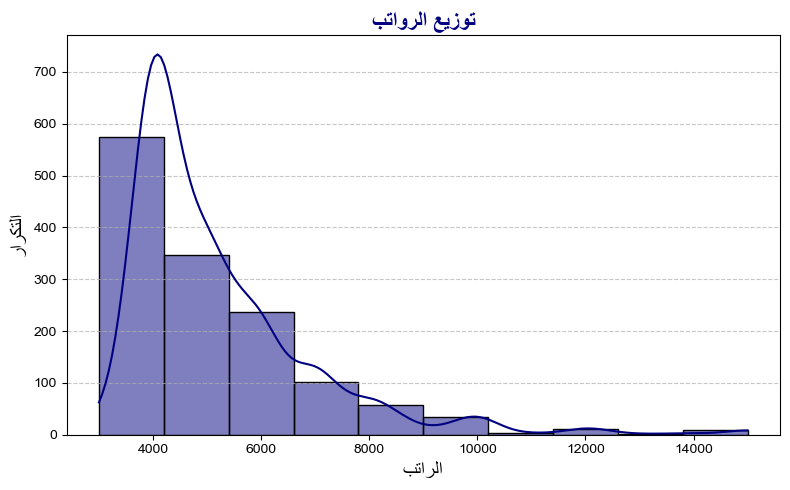

In [269]:
# Plotting the histogram
filtered_salaries = job_posts[job_posts['salary'] <= 15000]

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(filtered_salaries['salary'], bins=10, kde=True, color='navy')

# Arabic text for title and labels
title = "توزيع الرواتب"
xlabel = "الراتب"
ylabel = "التكرار"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Set titles and labels
plt.title(bidirectional_title, fontsize=16, weight='bold', color='navy')
plt.xlabel(bidirectional_xlabel, fontsize=14)
plt.ylabel(bidirectional_ylabel, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [270]:
# I See that it's better to consider what's above 15000 as an outlier because the distribution looks pretty normal after excluding them 

In [271]:
indexs = job_posts[(job_posts['salary_z_score'] > 4) | (job_posts['salary_z_score'] < -3)].sort_values(by='salary').index

job_posts.drop(indexs,inplace=True)

In [272]:
zscore(job_posts['experience_years'])
job_posts['experience_years_z_score'] = zscore(job_posts['experience_years'])

#Filter the DataFrame to remove outliers
filtered_df = job_posts[(job_posts['experience_years_z_score'] > 3.5) | (job_posts['experience_years'] < -3)]
filtered_df.sort_values(by='experience_years')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary,salary_z_score,experience_years_z_score
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,Qualification Not Specefied,...,دوام كامل,0 / 1,20202026349417,10,M,0,1,12000.0,3.048328,4.976703
429,حارس أمن,06/04/1444,['القيام بدوريات ومراقبة أماكن العمل لحراسة ال...,[' مراقبة عمليات الدخول إلى المنشأة ومغادرته...,مؤسسة الرجل أنيق التجارية,35-1946206,خاص,صغيرة فئة أ,البيع بالتجزئة للملابس الجاهزة الرجالية,Qualification Not Specefied,...,دوام كامل,0 / 3,20202026238199,10,M,0,3,4000.0,-0.590752,4.976703
442,مهندس كهربائي,05/04/1444,['إعداد التصاميم والمخططات الكهربائية لمشاريع ...,[' إعداد التصاميم والمخططات الكهربائية لمشار...,مكتب الإبداع الحديث للاستشارات الهندسية,9-2101436,خاص,صغيرة فئة أ,تقديم خدمات الاستشارات الهندسية في مجال الوقاي...,Qualification Not Specefied,...,دوام كامل,0 / 1,20202026236481,10,both,0,1,8000.0,1.228788,4.976703
506,مدير إداري,28/03/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,شركة خالد بن عبدالعزيز الملحم وشركاؤه للاستشار...,4-2006145,خاص,صغيرة فئة أ,أنشطة الاستشارات الهندسية والمعمارية,Qualification Not Specefied,...,دوام كامل,0 / 1,20202026207729,10,M,0,1,6000.0,0.319018,4.976703
558,مدير حسابات,05/05/1444,['المشاركة في تطوير الأهداف الرئيسية وسياسات و...,[' المشاركة في تطوير الأهداف الرئيسية لإدارة...,شركة روافد الحقول للوجبات السريعة شركة شخص واحد,9-2075281,خاص,صغيرة فئة ب,المطاعم مع الخدمة,Qualification Not Specefied,...,دوام كامل,0 / 1,20202026313728,10,both,0,1,10000.0,2.138558,4.976703
578,وكيل مدرسة,04/05/1444,['المشاركة في عملية إعداد الخطط الدورية والتشغ...,['وكيلة شؤون تعليمية في مدرسة عالمية متابعة...,شركة مدارس موسوعة العلوم الاهلية,1-383334,خاص,متوسطة فئة أ,التعليم المتوسط للطالبات بمنهج وطني,"['Skill data', 'اتقان اللغة الأنجليزية ', 'محت...",...,دوام كامل,0 / 1,20202026311955,10,F,0,1,8500.0,1.456230,4.976703
1171,مهندس معماري,01/06/1444,['تصميم المباني الجديدة أو الملحقات أو التعديل...,[' وضع التصاميم لمشاريع الإنشاءات وإدارة فري...,شركة متوازي للاستشارات الهندسية,10-2012202,خاص,صغيرة فئة أ,أنشطة الاستشارات في مجال الحاسب الآلي,"['Skill data', 'استقال العملاء', 'محترف', 'معر...",...,دوام كامل,0 / 1,20202026354976,10,both,0,1,8000.0,1.228788,4.976703
1254,فني حساب كميات,17/06/1444,['حساب كميات المواد اللازمة لتنفيذ الأعمال و إ...,[' دراسة المخططات الهندسية للمشروع، و دراسة ...,شركة زهير فايز ومشاركوه للاستشارات المعمارية ...,9-3774,خاص,متوسطة فئة ج,أنشطة الاستشارات الهندسية والمعمارية,"['Skill data', 'لدية خبرة في مجال مشاريع الإشر...",...,دوام كامل,0 / 1,20202026398094,10,M,0,1,9900.0,2.093069,4.976703
1255,مهندس مدني,17/06/1444,['دراسة طبوغرافية وجيولوجية الموقع الإنشائي ون...,[' دراسة طبوغرافية وجيولوجية الموقع الإنشائي...,شركة زهير فايز ومشاركوه للاستشارات المعمارية ...,9-3774,خاص,متوسطة فئة ج,أنشطة الاستشارات الهندسية والمعمارية,"['Skill data', 'لدية خبرة في تصميم وإشراف ومتا...",...,دوام كامل,0 / 1,20202026398075,10,M,0,1,9900.0,2.093069,4.976703
246,مدير إداري,20/04/1444,"['- تخصص هندسة كهربائية او هندسة ميكانيكية.', ...","[' - تخصص هندسة كهربائية او هندسة ميكانيكية.',...",شركة العمق للاستشارات الهندسية,1-349583,خاص,صغيرة فئة ب,أنشطة الاستشارات الهندسية والمعمارية,"['Language data', 'انجليزيه', 'محترف']",...,دوام كامل,0 / 1,20202026269515,12,M,0,1,10000.0,2.138558,6.110730


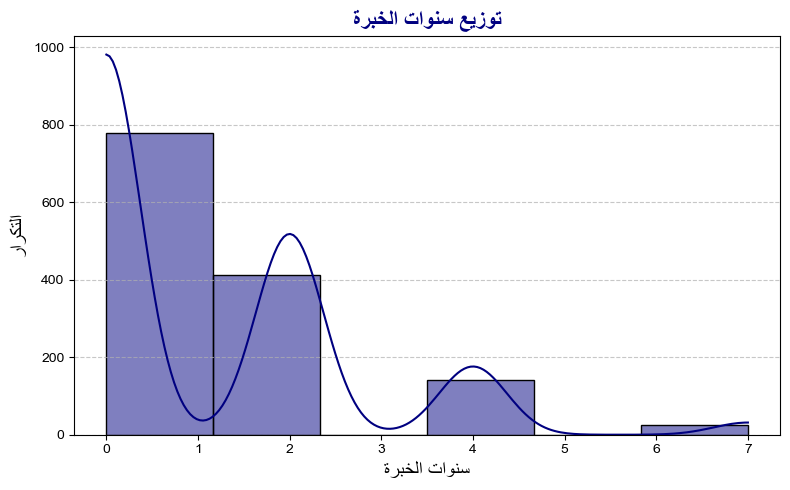

In [273]:
filtered_years = job_posts[job_posts['experience_years'] <= 7]
# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(filtered_years['experience_years'], bins=6, kde=True, color='navy')

# Arabic text for title and labels
title = "توزيع سنوات الخبرة"
xlabel = "سنوات الخبرة"
ylabel = "التكرار"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Set titles and labels
plt.title(bidirectional_title, fontsize=16, weight='bold', color='navy')
plt.xlabel(bidirectional_xlabel, fontsize=14)
plt.ylabel(bidirectional_ylabel, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [274]:
# I See that it's better to consider what's above 7 years as an outlier because the distribution looks pretty normal after excluding them 

In [275]:
indexs = job_posts[(job_posts['experience_years_z_score'] > 3.5) | (job_posts['experience_years'] < -3)].sort_values(by='experience_years').index

job_posts.drop(indexs,inplace=True)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [278]:
#job_posts_viz = sv.analyze(job_posts)

#job_posts_viz.show_html("sweetviz_report.html")

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [280]:
job_posts.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary', 'salary_z_score', 'experience_years_z_score'],
      dtype='object')

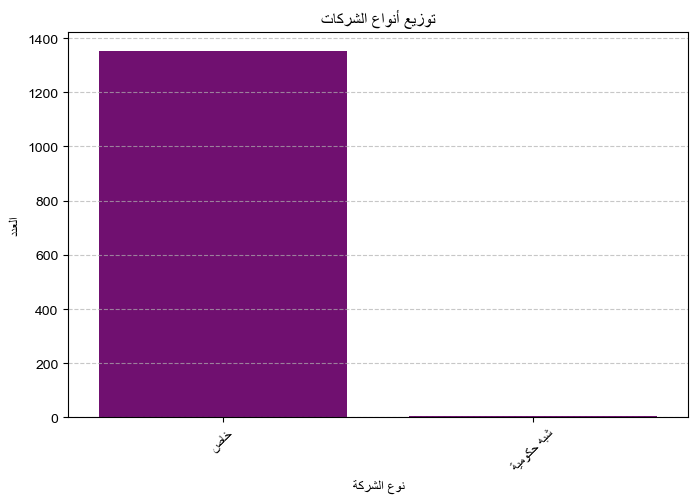

In [281]:
# Set font family to Arial
plt.rcParams["font.family"] = 'Arial' 

# Arabic text for title and labels
title = "توزيع أنواع الشركات"
xlabel = "نوع الشركة"
ylabel = "العدد"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Reshape and display x-tick labels (company types) in Arabic
job_posts['comp_type'] = job_posts['comp_type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=job_posts, x='comp_type', color='purple')
plt.title(bidirectional_title)  # Arabic title
plt.xlabel(bidirectional_xlabel)  # Arabic label
plt.ylabel(bidirectional_ylabel)  # Arabic label
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [282]:
# We can see the HUGE difference between how frequently private companies post job offers in Jadarat.sa 
# Unlike how super rare it is for governmental companies. So if you're looking for a job in a private company, Jadarat.sa will help you

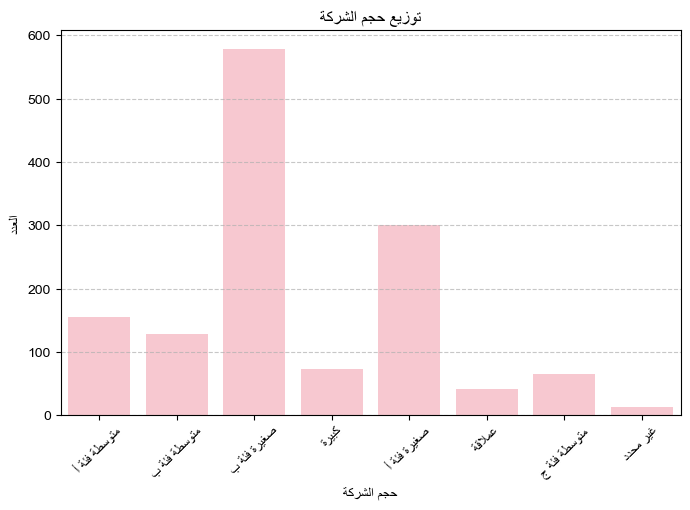

In [283]:
# Set font family to Arial
plt.rcParams["font.family"] = 'Arial'  # أو أي خط يدعم العربية

# Arabic text for title and labels
title = "توزيع حجم الشركة"
xlabel = "حجم الشركة"
ylabel = "العدد"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Reshape and display x-tick labels (company sizes) in Arabic
job_posts['comp_size'] = job_posts['comp_size'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=job_posts, x='comp_size', color='pink')
plt.title(bidirectional_title)  # Arabic title
plt.xlabel(bidirectional_xlabel)  # Arabic label
plt.ylabel(bidirectional_ylabel)  # Arabic label
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [284]:
# The type 'صغيرة فئة ب' has the largest frequency it's almost double the closest value

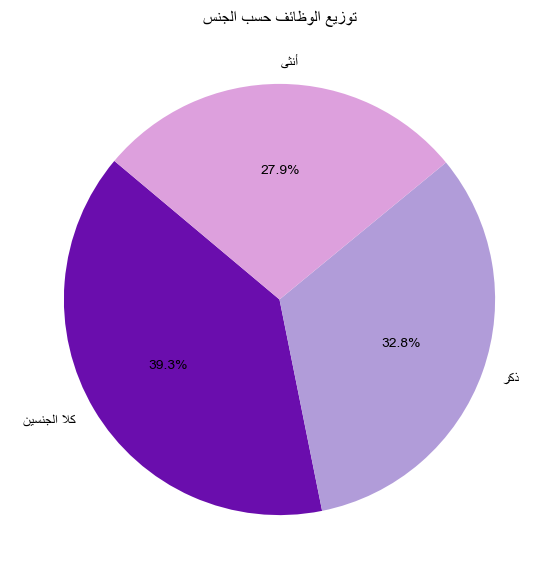

In [285]:
# Mapping English gender labels to Arabic
gender_mapping = {
    "M": "ذكر",
    "F": "أنثى",
    "both": "كلا الجنسين"
}

# Replace English labels with Arabic
gender_counts = job_posts['gender'].map(gender_mapping).value_counts()

# Arabic reshaping for labels
reshaped_labels = [get_display(arabic_reshaper.reshape(gender)) for gender in gender_counts.index]

# Plot pie chart
colors = ['#6a0dad', '#b19cd9', '#dda0dd']  # Purple shades
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=reshaped_labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Arabic title
title = "توزيع الوظائف حسب الجنس"
plt.title(get_display(arabic_reshaper.reshape(title)))

# Show the plot
plt.show()

In [286]:
# We can see clearly that the percentages are almost equally distributed between the jobs that ask for males and the ones that ask for both genders
# The jobs that ask for females only are less by almost 10% than the male ones

C:\Users\rahaf\AppData\Local\Temp\ipykernel_16360\3493529998.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




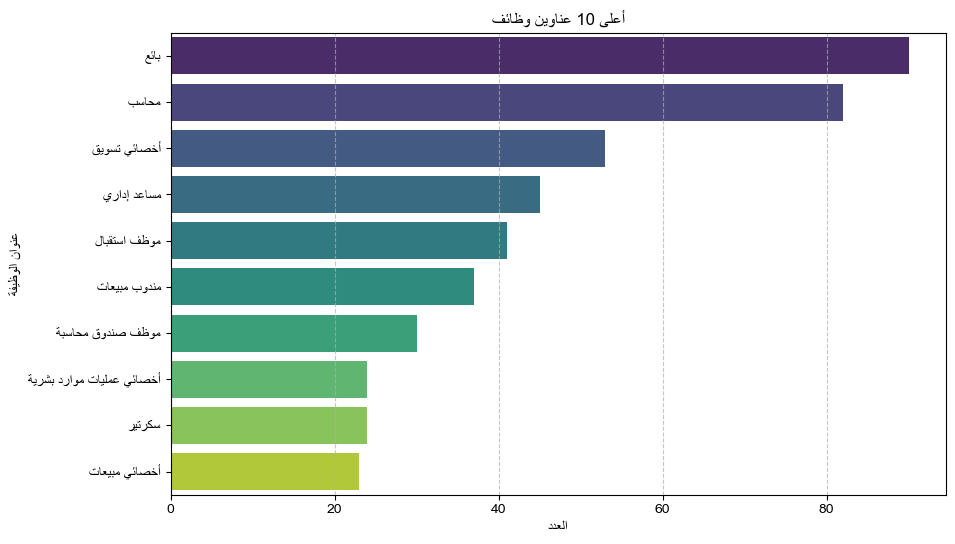

In [287]:
# Get the top 10 job titles
top_10_job_titles = job_posts['job_title'].value_counts().head(10)

# Reshape job titles for Arabic support (if needed)
reshaped_titles = [arabic_reshaper.reshape(title) for title in top_10_job_titles.index]

# Bidirectional support for Arabic text
bidirectional_titles = [get_display(title) for title in reshaped_titles]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_job_titles.values, y=bidirectional_titles, palette='viridis')
plt.title(get_display(arabic_reshaper.reshape('أعلى 10 عناوين وظائف')))  # Arabic title
plt.xlabel(get_display(arabic_reshaper.reshape('العدد')))  # Arabic label
plt.ylabel(get_display(arabic_reshaper.reshape('عنوان الوظيفة')))  # Arabic label
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [288]:
# The marketing and sales departments are highly requested, as we can see
# So we can tell that graduates with related majors to these jobs can look for different opportunities in Jadarat.sa

In [289]:
job_posts['qualif'].value_counts().head(15)


qualif
Qualification Not Specefied                                                                                640
['Language data', 'الانجليزية', 'متوسط']                                                                    23
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                                 9
['Language data', 'اللغة الانجليزية', 'محترف']                                                               8
['Language data', 'الانجليزية', 'محترف']                                                                     8
['Language data', 'العربية', 'محترف']                                                                        6
['Language data', 'اللغة الانجليزية', 'متوسط']                                                               6
['Language data', 'انجليزي', 'متوسط']                                                                        6
['Skill data', 'لدية خبرة في مجال تصميم وإشراف المشاريع', 'محترف', 'Language data', 'إنجليزي', 'محترف']  

In [290]:
# Top 15 qualifications asked by the employers focused mostly on English, and that shows the importance of learning English

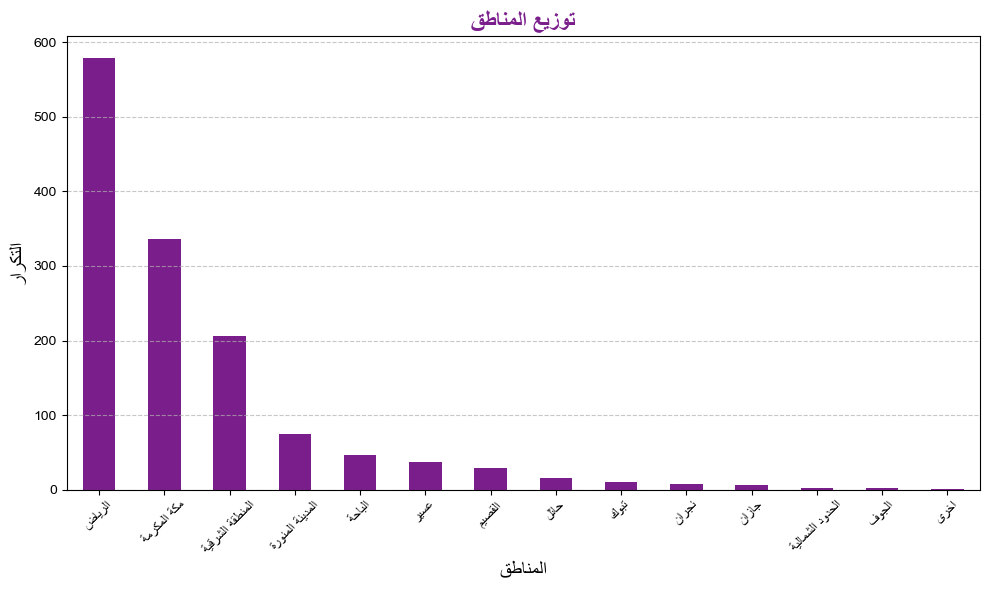

In [291]:
region_counts = job_posts['region'].value_counts()


# Reshape Arabic text for x-axis labels
reshaped_regions = [arabic_reshaper.reshape(r) for r in region_counts.index]
bidirectional_regions = [get_display(r) for r in reshaped_regions]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = region_counts.plot(kind='bar', color='#7a1e8b')  # Dark purple color for bars

# Arabic text for title and labels
title = "توزيع المناطق"
xlabel = "المناطق"
ylabel = "التكرار"

# Reshape Arabic text and apply bidirectional layout
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Set titles and labels
plt.title(bidirectional_title, fontsize=16, weight='bold', color='#7a1e8b')  # Arabic title
plt.xlabel(bidirectional_xlabel, fontsize=14)  # Arabic label
plt.ylabel(bidirectional_ylabel, fontsize=14)  # Arabic label
plt.xticks(ticks=range(len(bidirectional_regions)), labels=bidirectional_regions, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [292]:
# The job posts in Riyadh are nearly 600, which is almost 40% of the total of the job posts available in Jadarat.sa

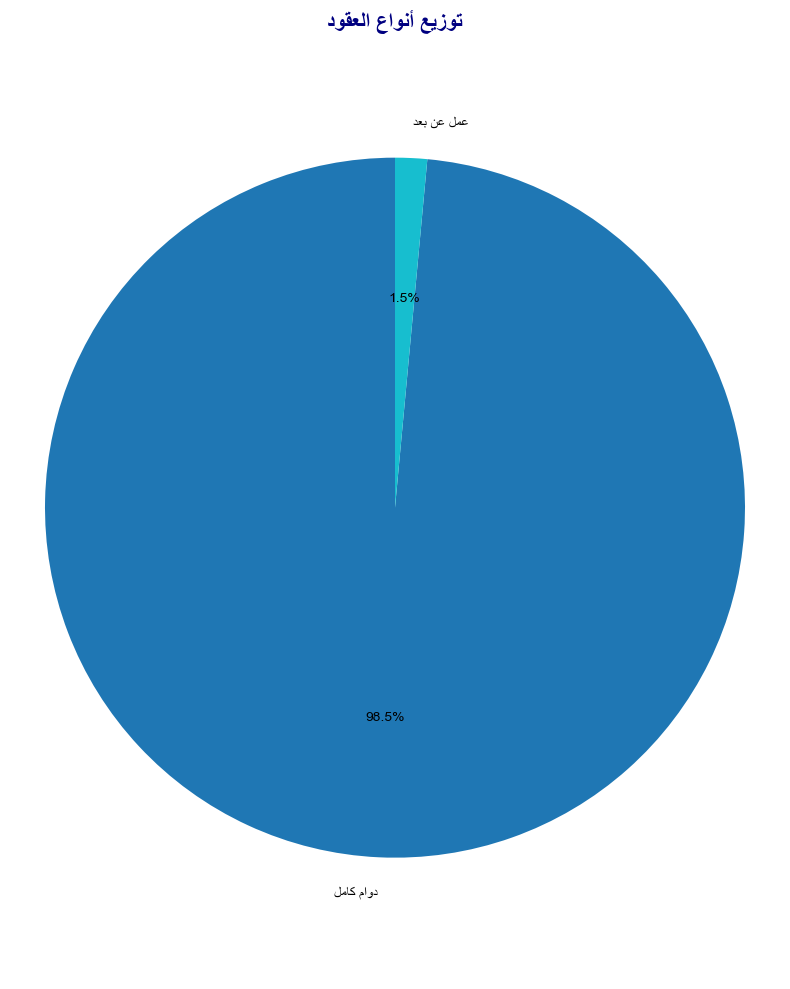

In [293]:
# Count the occurrences of each contract type
contract_counts = job_posts['contract'].value_counts()

# Reshape Arabic text for labels
reshaped_contracts = [arabic_reshaper.reshape(c) for c in contract_counts.index]
bidirectional_contracts = [get_display(c) for c in reshaped_contracts]

# Plotting the pie chart
plt.figure(figsize=(8, 10))
plt.pie(contract_counts, labels=bidirectional_contracts, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#17becf'])

# Arabic text for title
title = "توزيع أنواع العقود"
reshaped_title = arabic_reshaper.reshape(title)
bidirectional_title = get_display(reshaped_title)

# Set title
plt.title(bidirectional_title, fontsize=16, weight='bold', color='navy')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()  # Adjust layout
plt.show()

In [294]:
# Almost ALL of the jobs are full time jobs

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [296]:
job_posts.dtypes

job_title                    object
job_date                     object
job_desc                     object
job_tasks                    object
comp_name                    object
comp_no                      object
comp_type                    object
comp_size                    object
eco_activity                 object
qualif                       object
region                       object
city                         object
benefits                     object
contract                     object
positions                    object
job_post_id                   int64
experience_years              int64
gender                       object
available_positions           int64
total_positions               int64
salary                      float64
salary_z_score              float64
experience_years_z_score    float64
dtype: object

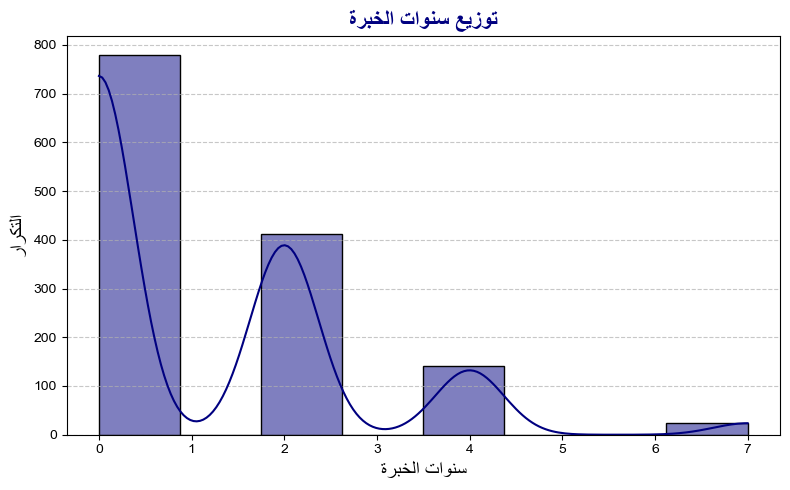

In [297]:
# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(job_posts['experience_years'], bins=8, kde=True, color='navy')

# Arabic text for title and labels
title = "توزيع سنوات الخبرة"
xlabel = "سنوات الخبرة"
ylabel = "التكرار"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Set titles and labels
plt.title(bidirectional_title, fontsize=16, weight='bold', color='navy')
plt.xlabel(bidirectional_xlabel, fontsize=14)
plt.ylabel(bidirectional_ylabel, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [298]:
# Nearly 50% of the posted jobs looks for fresh graduates or people who don't have a work experience in general

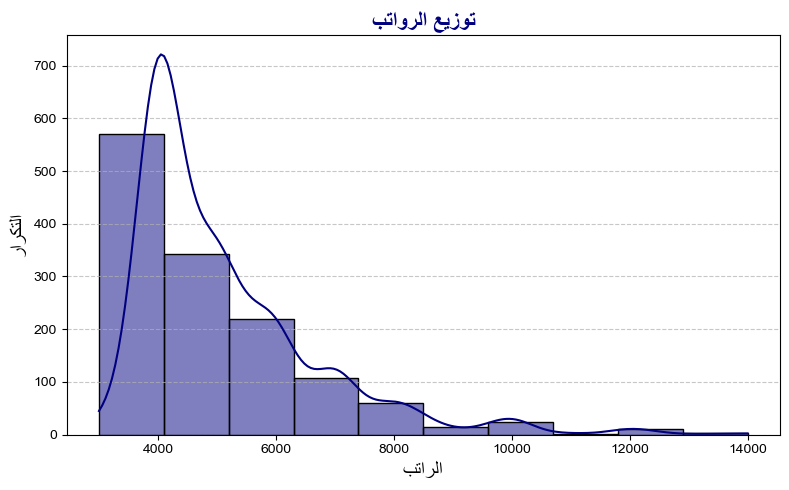

In [299]:
# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(job_posts['salary'], bins=10, kde=True, color='navy')

# Arabic text for title and labels
title = "توزيع الرواتب"
xlabel = "الراتب"
ylabel = "التكرار"

# Reshape Arabic text for title and labels
reshaped_title = arabic_reshaper.reshape(title)
reshaped_xlabel = arabic_reshaper.reshape(xlabel)
reshaped_ylabel = arabic_reshaper.reshape(ylabel)

# Bidirectional support for Arabic text
bidirectional_title = get_display(reshaped_title)
bidirectional_xlabel = get_display(reshaped_xlabel)
bidirectional_ylabel = get_display(reshaped_ylabel)

# Set titles and labels
plt.title(bidirectional_title, fontsize=16, weight='bold', color='navy')
plt.xlabel(bidirectional_xlabel, fontsize=14)
plt.ylabel(bidirectional_ylabel, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [300]:
# I can see that 80% of the jobs offer salaries between 3000-6000

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [302]:
job_posts.describe().T

,count,mean,std,min,25%,50%,75%,max
job_post_id,1357.0,2.020203e+13,59204.814434,2.020203e+13,2.020203e+13,2.020203e+13,2.020203e+13,2.020203e+13
experience_years,1357.0,1.148858e+00,1.565184,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00
available_positions,1357.0,1.621223e-02,0.179403,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
total_positions,1357.0,2.932203e+00,6.259021,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
salary,1357.0,5.140127e+03,1576.743430,3.000000e+03,4.000000e+03,4.500000e+03,6.000000e+03,1.400000e+04
salary_z_score,1357.0,-7.212578e-02,0.717237,-1.045637e+00,-5.907524e-01,-3.633099e-01,3.190177e-01,3.958098e+00
experience_years_z_score,1357.0,-4.201311e-02,0.887480,-6.934308e-01,-6.934308e-01,-6.934308e-01,4.405959e-01,3.275663e+00


In [303]:
 # Salary column:
 # Mean: 5,298.68 and Median: 4,500.
 # The mean is larger than the median, and this means the distribution is positively skewed.
 # Standard Deviation: 2,199.15, showing that there is a high variation in salaries.
 # Range: 3,000 to 35,000.
 # 25% of jobs offer salaries below 4,000, while 75% offer up to 6,000.


# Experience Years column:
 # Mean: 1.29 years and Median: 2 years.
 # The median is larger than the mean, and this means the distribution is negatively skewed.
 # Standard Deviation: 1.88 years, showing high variability.
 # Range: 0 to 12 years.
 # 25% of jobs require 0 years of experience, while 75% require up to 2 years.

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

### Heatmap

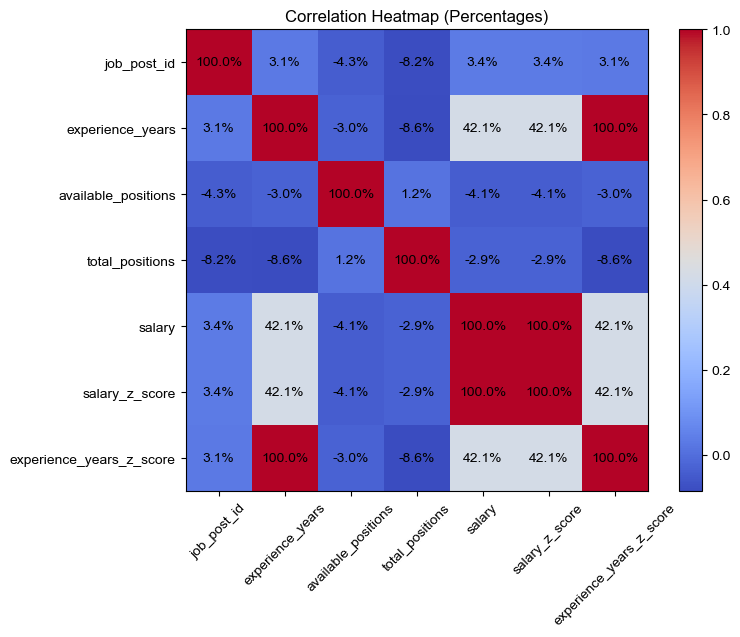

In [306]:

# Select numeric columns and exclude specific ones (without affecting main DataFrame)
numeric_df = job_posts.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(heatmap)

# Set axis labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.columns)), corr.columns)

# Annotate each cell with percentage values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]*100:.1f}%", ha='center', va='center', color='black')

plt.title('Correlation Heatmap (Percentages)')
plt.show()

In [307]:
# Strongest relationship: Experience Years & Salary (51.1%) is expected, as more experience generally means higher salary.

In [308]:
job_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1468
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_title                 1357 non-null   object 
 1   job_date                  1357 non-null   object 
 2   job_desc                  1357 non-null   object 
 3   job_tasks                 1357 non-null   object 
 4   comp_name                 1357 non-null   object 
 5   comp_no                   1357 non-null   object 
 6   comp_type                 1357 non-null   object 
 7   comp_size                 1357 non-null   object 
 8   eco_activity              1357 non-null   object 
 9   qualif                    1357 non-null   object 
 10  region                    1357 non-null   object 
 11  city                      1357 non-null   object 
 12  benefits                  1357 non-null   object 
 13  contract                  1357 non-null   object 
 14  positions    

# Q1 - What proportion of job postings is attributed to each region within the kingdom?

C:\Users\rahaf\AppData\Local\Temp\ipykernel_16360\1644399429.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




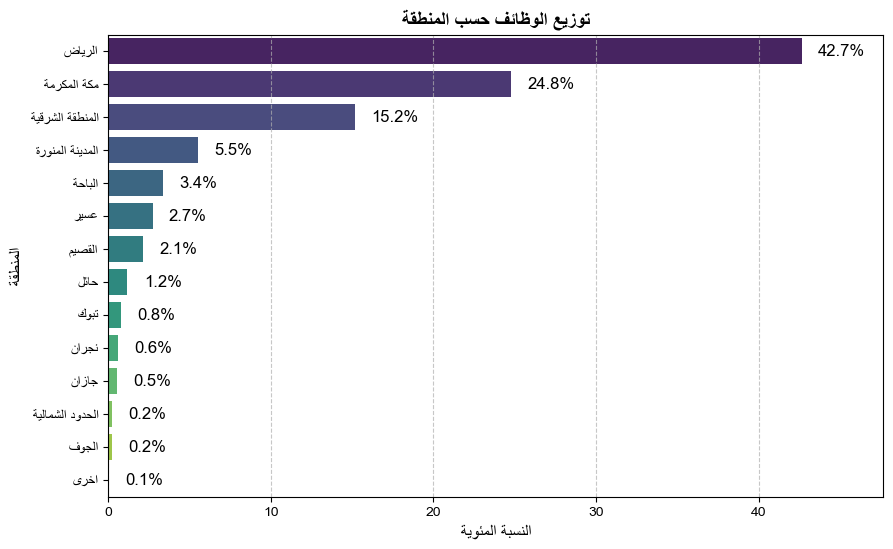

In [310]:
# Count job postings per region
region_counts = job_posts['region'].value_counts()
total_jobs = len(job_posts)  # Total job postings

# Calculate percentage
region_percentages = (region_counts / total_jobs) * 100

# Reshape Arabic text for labels
reshaped_labels = [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=region_percentages, y=reshaped_labels, palette="viridis")

# Add percentage labels on bars
for index, value in enumerate(region_percentages):
    plt.text(value + 1, index, f"{value:.1f}%", fontsize=12, color='black', va='center')

# Arabic title and labels
title = "توزيع الوظائف حسب المنطقة"
xlabel = "النسبة المئوية"
ylabel = "المنطقة"

plt.title(get_display(arabic_reshaper.reshape(title)), fontsize=14, fontweight='bold')
plt.xlabel(get_display(arabic_reshaper.reshape(xlabel)), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape(ylabel)), fontsize=12)

# Show the plot
plt.xlim(0, max(region_percentages) + 5)  # Adjust x-axis limit
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Q2 - Is there a gender preference indicated in the job postings?


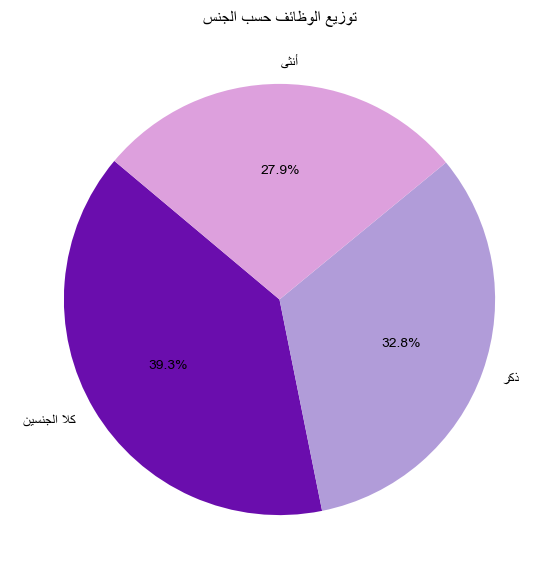

In [312]:
# Mapping English gender labels to Arabic
gender_mapping = {
    "M": "ذكر",
    "F": "أنثى",
    "both": "كلا الجنسين"
}

# Replace English labels with Arabic
gender_counts = job_posts['gender'].map(gender_mapping).value_counts()

# Arabic reshaping for labels
reshaped_labels = [get_display(arabic_reshaper.reshape(gender)) for gender in gender_counts.index]

# Plot pie chart
colors = ['#6a0dad', '#b19cd9', '#dda0dd']  # Purple shades
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=reshaped_labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Arabic title
title = "توزيع الوظائف حسب الجنس"
plt.title(get_display(arabic_reshaper.reshape(title)))

# Show the plot
plt.show()

# Q3 - What is the expected salary range for fresh graduates?

Expected Salary Range for Fresh Graduates: 3000.0 - 12325.0
Average Salary: 4729.54
Median Salary: 4000.00


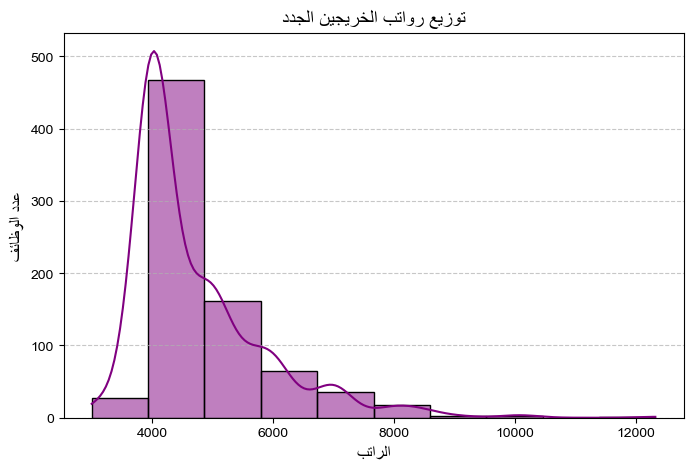

In [314]:
# Filter job postings for fresh graduates (experience = 0)
fresh_grads = job_posts[job_posts['experience_years'] == 0]

# Get salary statistics
min_salary = fresh_grads['salary'].min()
max_salary = fresh_grads['salary'].max()
avg_salary = fresh_grads['salary'].mean()
median_salary = fresh_grads['salary'].median()

print(f"Expected Salary Range for Fresh Graduates: {min_salary} - {max_salary}")
print(f"Average Salary: {avg_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")

# Arabic labels and title
title = "توزيع رواتب الخريجين الجدد"
xlabel = "الراتب"
ylabel = "عدد الوظائف"

reshaped_title = get_display(arabic_reshaper.reshape(title))
reshaped_xlabel = get_display(arabic_reshaper.reshape(xlabel))
reshaped_ylabel = get_display(arabic_reshaper.reshape(ylabel))

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(fresh_grads['salary'], bins=10, kde=True, color='purple')

plt.title(reshaped_title, fontsize=14)
plt.xlabel(reshaped_xlabel, fontsize=12)
plt.ylabel(reshaped_ylabel, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q4 - Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

C:\Users\rahaf\AppData\Local\Temp\ipykernel_16360\2081080893.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




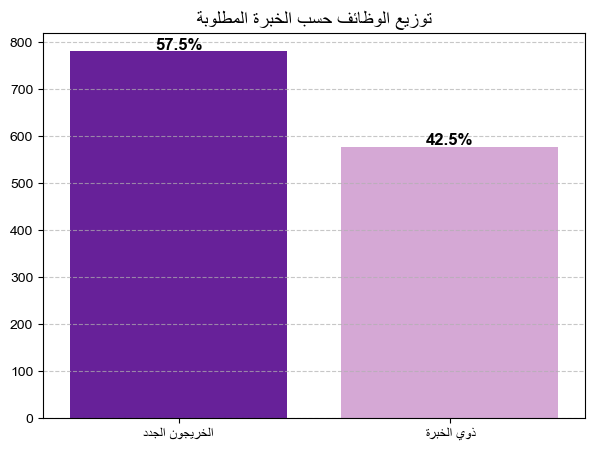

In [316]:
# Count job postings based on required experience years
experience_counts = job_posts['experience_years'].value_counts().sort_index()

# Categorize into "Fresh Graduates" (0 years) and "Experienced" (>0 years)
fresh_grads_count = experience_counts.get(0, 0)
experienced_count = experience_counts.drop(0).sum()

# Data for plotting
categories = ["الخريجون الجدد", "ذوي الخبرة"]
values = [fresh_grads_count, experienced_count]

# Arabic text reshaping
reshaped_categories = [get_display(arabic_reshaper.reshape(cat)) for cat in categories]
title = get_display(arabic_reshaper.reshape("توزيع الوظائف حسب الخبرة المطلوبة"))

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=reshaped_categories, y=values, palette=["#6a0dad", "#dda0dd"])

# Set labels in Arabic
plt.title(title, fontsize=14)

# Show percentage values on bars
for i, v in enumerate(values):
    plt.text(i, v + 5, f"{(v / sum(values) * 100):.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Extra Questions

## Q5 - Which industries have the highest number of job postings?

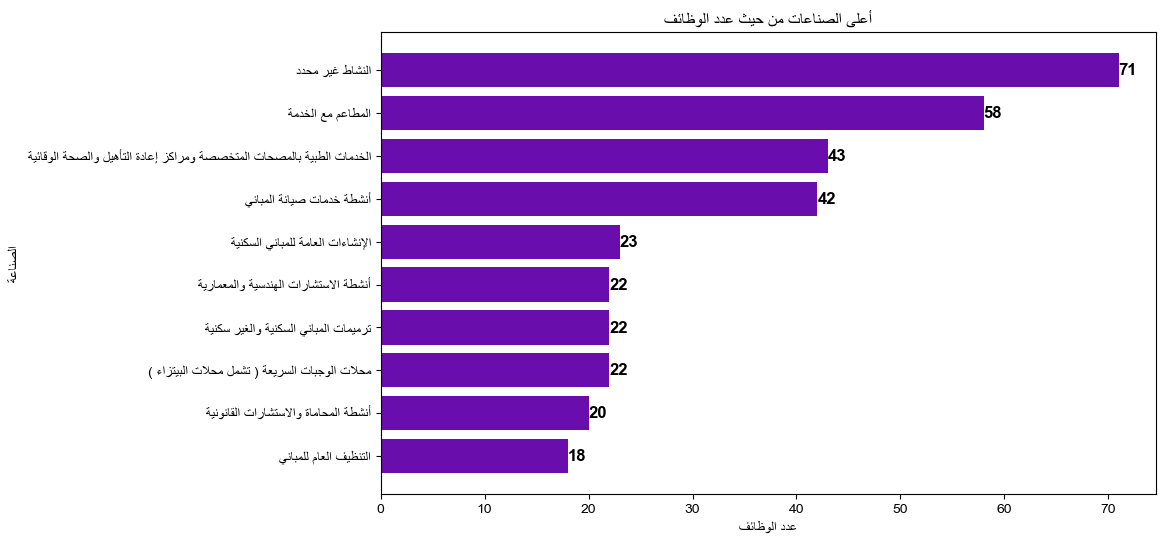

In [319]:
# Count job postings per industry
industry_counts = job_posts['eco_activity'].value_counts().head(10)  # Top 10 industries

# Reshape Arabic text for proper display
industry_labels = [get_display(arabic_reshaper.reshape(ind)) for ind in industry_counts.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(industry_labels, industry_counts.values, color='#6a0dad')

# Formatting
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الوظائف")))
plt.ylabel(get_display(arabic_reshaper.reshape("الصناعة")))
plt.title(get_display(arabic_reshaper.reshape("أعلى الصناعات من حيث عدد الوظائف")))

# Show values on bars
for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), va='center', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()  # Invert to have the highest on top
plt.show()

## Q6 - What are the top 10 job titles with the highest number of postings, and how do they vary by gender?

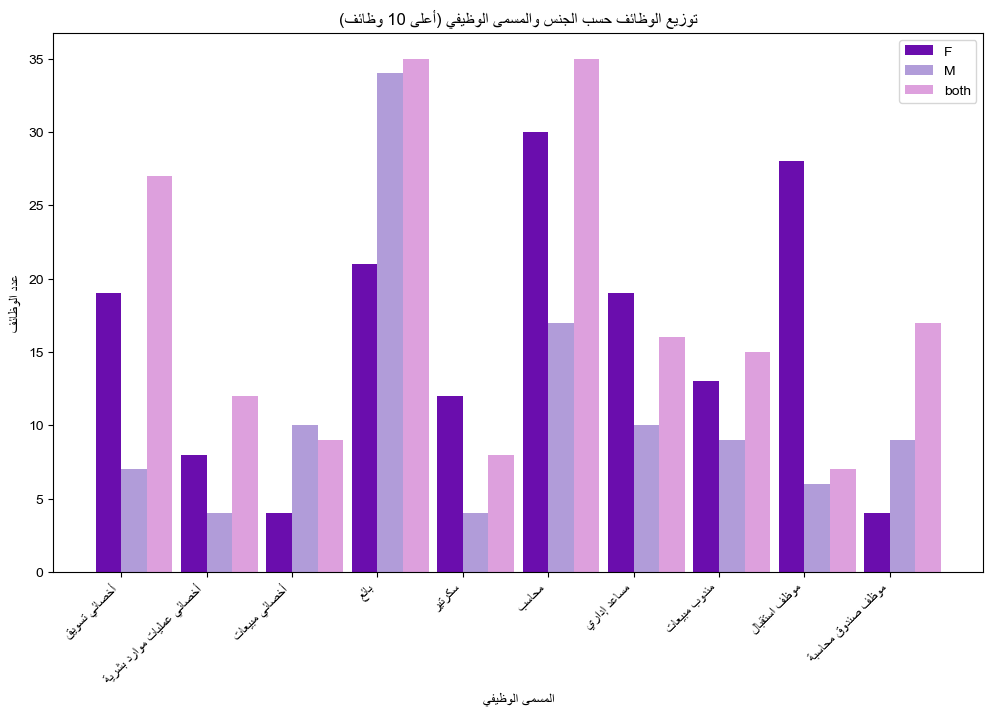

In [321]:
# Group job postings by job title and gender, then get the top 10 by total count
top_10_jobs = job_posts.groupby(['job_title', 'gender']).size().unstack().sum(axis=1).nlargest(10).index
industry_gender_counts = job_posts[job_posts['job_title'].isin(top_10_jobs)].groupby(['job_title', 'gender']).size().unstack()

# Arabic text reshaping for proper display
industry_labels = [get_display(arabic_reshaper.reshape(ind)) for ind in industry_gender_counts.index]
gender_labels = [get_display(arabic_reshaper.reshape(g)) for g in industry_gender_counts.columns]

# Colors for genders
colors = ['#6a0dad', '#b19cd9', '#dda0dd']

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
bar_width = 0.3  # Width of bars
indices = np.arange(len(industry_gender_counts))

for i, gender in enumerate(industry_gender_counts.columns):
    plt.bar(indices + i * bar_width, industry_gender_counts[gender], width=bar_width, label=get_display(arabic_reshaper.reshape(gender)), color=colors[i])

# Formatting
plt.xticks(indices + bar_width / 2, industry_labels, rotation=45, ha='right')
plt.xlabel(get_display(arabic_reshaper.reshape("المسمى الوظيفي")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد الوظائف")))
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف حسب الجنس والمسمى الوظيفي (أعلى 10 وظائف)")))
plt.legend()

# Show plot
plt.show()
